## ACIC Results Visualization

* This file is to visualize ACIC results and compare BV-NICE with benchmark models.
* Due to limited space, we will only publish part of the results in folder "sample results" to show the result format.


In [5]:
import os
import sys
import time

import numpy as np
import seaborn as sns; 
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [10]:
n_exp = 3
n_rep = 10

file_path = 'sample_results/CFR/'

# exp_mean
exp_results_ = np.zeros([n_exp,n_rep])
exp_results_val = np.zeros([n_exp,n_rep])
exp_results_test = np.zeros([n_exp,n_rep])

for i in range(n_exp):
    if np.mod(i+1,5)==0:
        print('%d / %d' % (i+1, n_exp))
    for j in range(n_rep):
        data_file = file_path + str(i+1) + '_' + str(j) + '_results.npy'
        data = np.load(data_file)
        
        rmse_min_ind = np.argmin(data[:,1,3] )  # find the run where rmse is minimum
        exp_results_[i,j] = data[rmse_min_ind,0,0]
        exp_results_val[i,j] = data[rmse_min_ind,1,0]
        exp_results_test[i,j] = data[rmse_min_ind,2,0]
        
mean_cfr_pehe_test = np.mean(exp_results_test,axis=1)

In [11]:

n_exp = 3
n_rep = 10

file_path = 'sample_results/BVNICE/'

# exp_mean

exp_results_ = np.zeros([n_exp,n_rep])
exp_results_val = np.zeros([n_exp,n_rep])
exp_results_test = np.zeros([n_exp,n_rep])

for i in range(n_exp):
    for j in range(n_rep):
        data_file = file_path + str(i+1) + '_' + str(j) + '_results.npy'
        data = np.load(data_file)
        
        rmse_min_ind = np.argmin(data[:,1,3] )  # find the run where rmse is minimum
        exp_results_[i,j] = data[rmse_min_ind,0,0]
        exp_results_val[i,j] = data[rmse_min_ind,1,0]
        exp_results_test[i,j] = data[rmse_min_ind,2,0]
        
mean_bnice_pehe_test = np.mean(exp_results_test,axis=1)

In [12]:

n_exp = 3
n_rep = 10

file_path = 'sample_results/BART/'

# exp_mean

exp_results_ = np.zeros([n_exp,n_rep])
exp_results_val = np.zeros([n_exp,n_rep])
exp_results_test = np.zeros([n_exp,n_rep])

for i in range(n_exp):
    if np.mod(i+1,5)==0:
        print('%d / %d' % (i, n_exp))
    for j in range(n_rep):
        data_file = file_path + str(i+1) + '_' + str(j) + '_results.npy'
        data = np.load(data_file)
        exp_results_[i,j] = data[1]
        exp_results_val[i,j] = data[2]
        exp_results_test[i,j] = data[3]
        
mean_bart_pehe_test = np.mean(exp_results_test,axis=1)

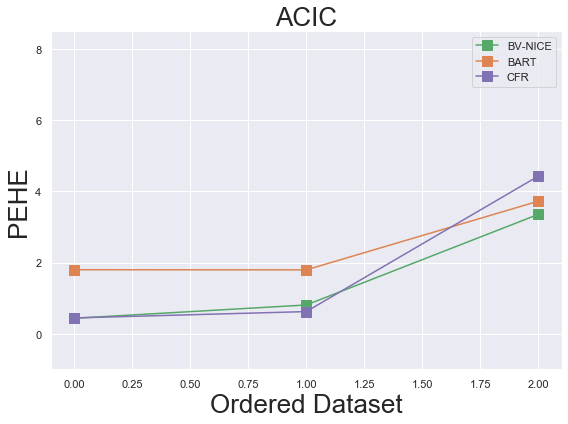

In [20]:
# mean_pehe_ = np.mean(exp_results_,axis=1)

s_ind = np.argsort(mean_bnice_pehe_test)

fs = 26

lw = 5
ms = 10

fig_handle = plt.figure(figsize=(8,6))

_ = plt.plot(mean_bnice_pehe_test[s_ind],'s-',ms=ms,color='C2',label='BV-NICE')
_ = plt.plot(mean_bart_pehe_test[s_ind],'s-',ms=ms,color='C1',label='BART')
_ = plt.plot(mean_cfr_pehe_test[s_ind],'s-',ms=ms,color='C4',label='CFR')
_ = plt.legend()


ax = plt.gca()

_ = plt.xlabel('Ordered Dataset',fontsize=fs)
_ = plt.ylabel('PEHE',fontsize=fs)
_ = plt.title('ACIC',fontsize = fs)
_ = plt.ylim([-1,8.5])


plt.tight_layout()

